<div class="alert alert-info">

<h1> TU Delft - EPA1333 - Computer Engineering for Scientific Computing - 2017 </h1>

<h2>  Final assignment </h2> 
<br />

<h4>  Group 40: </h4> 
<br />

<li> Luca de Laat 4135040 </li> 

<li> Pawel Marciniak 4633482 </li> 

</div>

### WORK CELL - to be removed before submission
"analyse which countries are most effecient at reducing CO2 emission/deforestation/overfishing... while staying competitive in the global market. The idea is to find which countries have the most effective policy for fighting climate change at the lowest cost.we'd need to find some kind of index or define one ourselves."

# Research Problem Description

Nowadays, most countries around the world see climate change as a fact. Extreme weather events occur more frequently, cause more damage and affect a bigger part of the population. However, when it comes to taking measures against climate change, many countries are reluctant. Policies used to mitigate the risks often have negative impacts on the economy. Usually, energy and transport becomes more expensive making it less attractive for companies to settle thus hampering economic growth. This lead us to the question which policies are most effecient at combatting the causes of climate change i.e. which countries reduce their carbon footprint at the lowest cost.<br />

As such policies are moslty implemented at a national level we will start by taking a high level approach and compare data across different countries. A subsequent step would be to zoom in and analyse the specific measures and regulations imposed by these governments while taking into account their local economy and the environmental challenges they face. Next, one can determine which subset of policies and combination thereof are best and use these as guidelines to improve governance in countries lacking behind on the subject.

In order to perform a meaningful analysis across multiple countries we would have to derive an index that captures the many dependecies between policies, their ecological impact as well as their cost both on the short and long term. Due to the the temporal limitations set by the assignement we will focus on a first order assesment of the aforementioned factors.

For our analysis we have chosen to include <span style="background-color: #FFFF00">9</span> indicators:

1) CO2 emissions (metric tons per capita) <br />
2) GDP (in current US dollars)<br />
3) GDP per unit of energy use (constant 2011 PPP dollars per kg of oil equivalent) <br />
4) Energy use (kg of oil equivalent per capita) <br />
5) Renewable energy consumption (% of total final energy consumption) <br />
6) Electricity production from renewable sources, excluding hydroelectric (kWh) <br />
7) Alternative and nuclear energy (% of total energy use) <br />
8) Renewable electricity output (% of total electricity output) <br />
9) Population growth (annual %) <br />

 <span style="background-color: #FFFF00">FINISH THIS SECTION !!!</span>
 
# Analysis suggestions

 A) <br/>
1) Compare % increase in total greenhouse gas emissions over the years <br/>
2) See if this correlates with % increase of renewable energy production/consumption over years

B) <br/>
1) See if top ranking countries from A also rank high in GPD / unit energy use i.e. does reducing carbon footprint possitively affect the energy efficiency of the economy <br/>

C) <br/>
1) Are countries that reduce % increase in total greenhouse gas emissions also the ones that have lowest Energy use (kg of oil equivalent per capita). That is, these countries achieve a decrease of total greenhouse gas emissions by reducing energy use or by generating more renewable energy (and how do these factors scale)<br/>

D) <br/>
1) Where are high ranking countries located?
2) How developped are they?
3) How urbanised are they?

# Structure of the report

This report is structured as follows:

1. We first prepare our analysis environment by downloading necessary python libraries, and articulating what data would be useful to tackle the research problem. <br />
2. We then proceed to download the data from the data source; in our case, the World Bank. <br /> 
3. Next we explore the data and make sure that we keep the relevant subsections of the data, format the data etc. <br />
4. We then proceed to analysing the data, visualizing it and discussing the results. <br />

# Preparation

## Importing necessary libraries

In [100]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import requests
#import xml.etree.ElementTree as etree
from pandas_datareader import wb

## Data exploration at the source

We explored World Bank data bases and selected those indicators which we found interesting for our report. The full list of indicators (i.e. data items collected by World Bank) is available through this api link:

http://api.worldbank.org/indicators

A more convenient way to explore available data is to download the relevant csv / Excel files with list of indicators from the https://data.worldbank.org/data-catalog/ pages, and then reviewing these files to identify interesting indicators to explore. This is what we did. We explored the following sets of indicators:

* https://data.worldbank.org/data-catalog/climate-change
* https://data.worldbank.org/data-catalog/world-development-indicators

and create the following list of selected indicators to use for our analysis:

In [2]:
# creating list of interesting indicators 
# we are going to download all data for these indicators directly from World Bank DB

selectedInd = [
    'EN.ATM.GHGT.KT.CE', # Total greenhouse gas emissions (kt of CO2 equivalent)
    'EN.ATM.CO2E.PC',    # CO2 emissions (metric tons per capita)
    'NY.GDP.MKTP.CD',     # GDP (in current US$)
    'EG.GDP.PUSE.KO.PP.KD', #GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)
    'EG.USE.PCAP.KG.OE',  #Energy use (kg of oil equivalent per capita)
    'EG.FEC.RNEW.ZS',    #Renewable energy consumption (% of total final energy consumption)
    'EG.ELC.RNWX.KH',    #Electricity production from renewable sources, excluding hydroelectric (kWh)'
    'EG.USE.COMM.CL.ZS', #Alternative and nuclear energy (% of total energy use)'
    'EG.ELC.RNEW.ZS',    #Renewable electricity output (% of total electricity output)'
    #'IQ.CPA.ENRV.XQ',    #CPIA policy and institutions for environmental sustainability rating (1=low to 6=high)
    'SP.POP.GROW',       #Population growth (annual %)
    'NY.GDP.MKTP.KD.ZG', # GDP growth (annual %)
    'NY.GDP.PCAP.KD.ZG', # GDP per capita growth (annual %)
]

# TO DO: complete this list!

 <span style="background-color: #FFFF00">COMPLETE LIST ABOVE !!!</span>

# Downloading the data from World Bank Data Base

In [3]:
# initializing an empty pandas data frame 
# we need this if we want to come back to this cell from below to re-download the data 
df_raw = pd.DataFrame() 
df_raw.info()

# downloading data for the first of the indicators
# if we try to download all the data at once, there are problems with reindexing of the data frame
print('\n')
df_raw = wb.download(indicator=selectedInd[0], country=['all'], start=1988, end=2017)
print('WB data: downloaded ', str(0+1).zfill(2),'/', len(selectedInd), ': ',selectedInd[0], '\n')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

WB data: downloaded  01 / 12 :  EN.ATM.GHGT.KT.CE 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7656 entries, (Arab World, 2016) to (Zimbabwe, 1988)
Data columns (total 1 columns):
EN.ATM.GHGT.KT.CE    5752 non-null float64
dtypes: float64(1)
memory usage: 84.6+ KB


In [4]:
# now downloading data for the remaining indicators. This may take a while

for x in range(1, len(selectedInd)):
    df_raw[selectedInd[x]] = wb.download(indicator = selectedInd[x], country=['all'], start=1988, end=2017)
    print('WB data: downloaded ', str(x+1).zfill(2),'/', len(selectedInd), ': ',selectedInd[x])

print('\n')
df_raw.info()

WB data: downloaded  02 / 12 :  EN.ATM.CO2E.PC
WB data: downloaded  03 / 12 :  NY.GDP.MKTP.CD
WB data: downloaded  04 / 12 :  EG.GDP.PUSE.KO.PP.KD
WB data: downloaded  05 / 12 :  EG.USE.PCAP.KG.OE
WB data: downloaded  06 / 12 :  EG.FEC.RNEW.ZS
WB data: downloaded  07 / 12 :  EG.ELC.RNWX.KH
WB data: downloaded  08 / 12 :  EG.USE.COMM.CL.ZS
WB data: downloaded  09 / 12 :  EG.ELC.RNEW.ZS
WB data: downloaded  10 / 12 :  SP.POP.GROW
WB data: downloaded  11 / 12 :  NY.GDP.MKTP.KD.ZG
WB data: downloaded  12 / 12 :  NY.GDP.PCAP.KD.ZG


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7656 entries, (Arab World, 2016) to (Zimbabwe, 1988)
Data columns (total 12 columns):
EN.ATM.GHGT.KT.CE       5752 non-null float64
EN.ATM.CO2E.PC          6503 non-null float64
NY.GDP.MKTP.CD          6903 non-null float64
EG.GDP.PUSE.KO.PP.KD    4488 non-null float64
EG.USE.PCAP.KG.OE       4994 non-null float64
EG.FEC.RNEW.ZS          6167 non-null float64
EG.ELC.RNWX.KH          4952 non-null float64
EG.USE.C

# Data preparation and pre-processing

In [5]:
# Let's see how this data frame is indexed
df_raw.index.levels

FrozenList([['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', 'Cote d'Ivoire', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high inco

In [6]:
df_raw.index.names

FrozenList(['country', 'year'])

In [7]:
# We notice that the last level ('year') contains string values. Let's change that to integer.
df_raw.index = df_raw.index.set_levels([df_raw.index.levels[0], df_raw.index.levels[1].astype(int)])

In [8]:
df_raw.index.levels

FrozenList([['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', 'Cote d'Ivoire', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high inco

In [9]:
df_raw.index.names

FrozenList(['country', 'year'])

In [10]:
# We also noticed that World Bank uses groupings of countries in the index. Let's see what values we have in the corresponding index item:

wbCountries = list(df_raw.index.get_level_values('country').unique())
wbCountries

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA only',
 'IDA total',
 'Late-demographic dividend',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Middle inc

If we only want to analyse data on the country level, and ditch the groupings data, we need to take data starting with 'Afghanistan', so let's take its index and slice the list to create the list containing countries only:

In [11]:
selected_wbCountries= wbCountries[wbCountries.index('Afghanistan'):]
selected_wbCountries

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Pol

In [26]:
# subsetting our data frame to data with only the selected countries:

df_raw.sort_index(inplace=True)
idx = pd.IndexSlice
df = df_raw.loc[idx[selected_wbCountries, :], :]#.copy() # do we want to copy to create a new object?
df

EN.ATM.GHGT.KT.CE  EN.ATM.CO2E.PC  NY.GDP.MKTP.CD  \
country     year                                                      
Afghanistan 1988       12959.294800        0.248473             NaN   
            1989       12348.957000        0.235695             NaN   
            1990       12528.016500        0.213450             NaN   
            1991       12307.063800        0.187673             NaN   
            1992       11370.453100        0.099666             NaN   
            1993       11390.874800        0.089154             NaN   
            1994       11290.688200        0.080039             NaN   
            1995       11635.659400        0.072699             NaN   
            1996       12505.930800        0.066045             NaN   
            1997       13343.250000        0.059648             NaN   
            1998       13793.367000        0.055207             NaN   
            1999       14812.366000        0.042333             NaN   
            2000       13530.953000        0.038506             NaN   
            2001       12585.402000        0.039002    2.461666e+09   
            2002       13842.738100        0.048716    4.128821e+09   
            2003       14709.884000        0.051830    4.583644e+09   
            2004       14654.374000        0.039378    5.285466e+09   
            2005       14770.264300        0.052948    6.275074e+09   
            2006       14849.159400        0.063728    7.057598e+09   
            2007       15272.633000        0.085418    9.843842e+09   
            2008       15288.775600        0.154101    1.019053e+10   
            2009       15554.429500        0.241723    1.248694e+10   
            2010       17791.329902        0.293837    1.593680e+10   
            2011       17981.307287        0.412017    1.793024e+10   
            2012                NaN        0.350371    2.053654e+10   
            2013                NaN        0.315602    2.004633e+10   
            2014                NaN        0.299445    2.005019e+10   
            2015                NaN             NaN    1.970299e+10   
            2016                NaN             NaN    1.946902e+10   
Albania     1988       12603.886700        2.331599    2.126000e+09   
...                             ...             ...             ...   
Zambia      2016                NaN             NaN    1.955109e+10   
Zimbabwe    1988       29369.643000        1.676519    7.814784e+09   
            1989       30264.471000        1.634544    8.286323e+09   
            1990       35100.590000        1.536212    8.783817e+09   
            1991       34132.529000        1.527823    8.641482e+09   
            1992       38275.978000        1.592383    6.751472e+09   
            1993       30183.416000        1.500323    6.563813e+09   
            1994       30208.734000        1.600795    6.890675e+09   
            1995       30376.986000        1.336535    7.111271e+09   
            1996       30570.239000        1.301790    8.553147e+09   
            1997       29469.426000        1.230371    8.529572e+09   
            1998       76391.804000        1.198462    6.401968e+09   
            1999       66724.652000        1.312450    6.858013e+09   
            2000       51434.535000        1.139201    6.689958e+09   
            2001       58452.519000        1.018598    6.777385e+09   
            2002       50281.895000        0.957193    6.342116e+09   
            2003       48216.933000        0.843469    5.727592e+09   
            2004       61742.544000        0.742440    5.805598e+09   
            2005       59894.603000        0.832299    5.755215e+09   
            2006       55535.280000        0.796028    5.443896e+09   
            2007       60917.825000        0.741658    5.291950e+09   
            2008       68840.706000        0.573101    4.415703e+09   
            2009       67914.131008        0.405716    8.366794e+09   
            2010       71019.116728       

TypeError: Empty 'DataFrame': no numeric data to plot

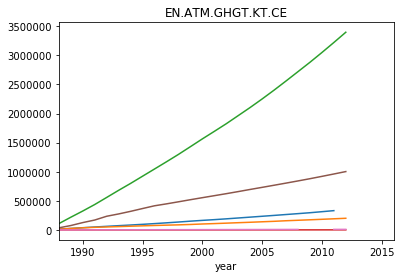

In [103]:
# plotting cumsums but has error with NaNs
for indicator in df.columns:
    plt.figure()
    plt.title(indicator)
    for country in df.index.levels[0][:10]:    
        df.loc[country][indicator].cumsum().plot()


In [92]:
df.loc['France'][df.columns[0]]

year
1988    533912.040000
1989    547917.630000
1990    554685.280000
1991    580971.950000
1992    564014.190000
1993    541094.380000
1994    538140.600000
1995    543013.140000
1996    572529.080000
1997    565220.990000
1998    577851.541000
1999    563699.027000
2000    559922.199000
2001    565204.329800
2002    557850.127500
2003    564607.176000
2004    560648.843200
2005    557130.126300
2006    547361.376100
2007    540947.135900
2008    544424.061700
2009    527525.776542
2010    532133.040361
2011    502656.654983
2012    499146.634492
2013              NaN
2014              NaN
2015              NaN
2016              NaN
Name: EN.ATM.GHGT.KT.CE, dtype: float64

In [73]:
df.loc['France'].columns[0]

'EN.ATM.GHGT.KT.CE'

 <span style="background-color: #FFFF00">FINISH CELL BELOW </span>

In [13]:
# interpolating missing data
# not all I guess, need to figure out what to interpolate, and what to ignore
# we might not need interpolation at all actually



In [14]:
# We want to get additional information about countries metadata from world bank data bases.
# We will use this information later for plotting on a world map, and so we need the longtitude and latitude of countries.
# based on https://datahelpdesk.worldbank.org/knowledgebase/articles/898590-api-country-queries

countries_raw = requests.get('http://api.worldbank.org/countries?per_page=12000&format=json')
countries_raw.text

'[{"page":1,"pages":1,"per_page":"12000","total":304},[{"id":"ABW","iso2Code":"AW","name":"Aruba","region":{"id":"LCN","value":"Latin America & Caribbean "},"adminregion":{"id":"","value":""},"incomeLevel":{"id":"HIC","value":"High income"},"lendingType":{"id":"LNX","value":"Not classified"},"capitalCity":"Oranjestad","longitude":"-70.0167","latitude":"12.5167"},{"id":"AFG","iso2Code":"AF","name":"Afghanistan","region":{"id":"SAS","value":"South Asia"},"adminregion":{"id":"SAS","value":"South Asia"},"incomeLevel":{"id":"LIC","value":"Low income"},"lendingType":{"id":"IDX","value":"IDA"},"capitalCity":"Kabul","longitude":"69.1761","latitude":"34.5228"},{"id":"AFR","iso2Code":"A9","name":"Africa","region":{"id":"NA","value":"Aggregates"},"adminregion":{"id":"","value":""},"incomeLevel":{"id":"NA","value":"Aggregates"},"lendingType":{"id":"","value":"Aggregates"},"capitalCity":"","longitude":"","latitude":""},{"id":"AGO","iso2Code":"AO","name":"Angola","region":{"id":"SSF","value":"Sub-Sa

In [15]:
# We got a long string, which has a structure of a list of dictionaries. Converting this to something python can parse. 

import json
countries_json = json.loads(countries_raw.text)
countries_json

[{'page': 1, 'pages': 1, 'per_page': '12000', 'total': 304},
 [{'adminregion': {'id': '', 'value': ''},
   'capitalCity': 'Oranjestad',
   'id': 'ABW',
   'incomeLevel': {'id': 'HIC', 'value': 'High income'},
   'iso2Code': 'AW',
   'latitude': '12.5167',
   'lendingType': {'id': 'LNX', 'value': 'Not classified'},
   'longitude': '-70.0167',
   'name': 'Aruba',
   'region': {'id': 'LCN', 'value': 'Latin America & Caribbean '}},
  {'adminregion': {'id': 'SAS', 'value': 'South Asia'},
   'capitalCity': 'Kabul',
   'id': 'AFG',
   'incomeLevel': {'id': 'LIC', 'value': 'Low income'},
   'iso2Code': 'AF',
   'latitude': '34.5228',
   'lendingType': {'id': 'IDX', 'value': 'IDA'},
   'longitude': '69.1761',
   'name': 'Afghanistan',
   'region': {'id': 'SAS', 'value': 'South Asia'}},
  {'adminregion': {'id': '', 'value': ''},
   'capitalCity': '',
   'id': 'AFR',
   'incomeLevel': {'id': 'NA', 'value': 'Aggregates'},
   'iso2Code': 'A9',
   'latitude': '',
   'lendingType': {'id': '', 'value'

In [16]:
# first item on the list above is not an actual country, so removing it
countries_json.pop(0)

{'page': 1, 'pages': 1, 'per_page': '12000', 'total': 304}

In [17]:
# putting what's left into a data frame. Using 'name' as index to make it easy to join the frames later
# (since we have a list of countries actual names in the other data frame.)
countriesDF = pd.DataFrame(data = countries_json[0][:], index = [d['name'] for d in countries_json[0][:]]) 

In [18]:
countriesDF

,adminregion,capitalCity,id,incomeLevel,iso2Code,latitude,lendingType,longitude,name,region
Aruba,"{'id': '', 'value': ''}",Oranjestad,ABW,"{'id': 'HIC', 'value': 'High income'}",AW,12.5167,"{'id': 'LNX', 'value': 'Not classified'}",-70.0167,Aruba,"{'id': 'LCN', 'value': 'Latin America & Caribb..."
Afghanistan,"{'id': 'SAS', 'value': 'South Asia'}",Kabul,AFG,"{'id': 'LIC', 'value': 'Low income'}",AF,34.5228,"{'id': 'IDX', 'value': 'IDA'}",69.1761,Afghanistan,"{'id': 'SAS', 'value': 'South Asia'}"
Africa,"{'id': '', 'value': ''}",,AFR,"{'id': 'NA', 'value': 'Aggregates'}",A9,,"{'id': '', 'value': 'Aggregates'}",,Africa,"{'id': 'NA', 'value': 'Aggregates'}"
Angola,"{'id': 'SSA', 'value': 'Sub-Saharan Africa (ex...",Luanda,AGO,"{'id': 'LMC', 'value': 'Lower middle income'}",AO,-8.81155,"{'id': 'IBD', 'value': 'IBRD'}",13.242,Angola,"{'id': 'SSF', 'value': 'Sub-Saharan Africa '}"
Albania,"{'id': 'ECA', 'value': 'Europe & Central Asia ...",Tirane,ALB,"{'id': 'UMC', 'value': 'Upper middle income'}",AL,41.3317,"{'id': 'IBD', 'value': 'IBRD'}",19.8172,Albania,"{'id': 'ECS', 'value': 'Europe & Central Asia'}"
Andorra,"{'id': '', 'value': ''}",Andorra la Vella,AND,"{'id': 'HIC', 'value': 'High income'}",AD,42.5075,"{'id': 'LNX', 'value': 'Not classified'}",1.5218,Andorra,"{'id': 'ECS', 'value': 'Europe & Central Asia'}"
Andean Region,"{'id': '', 'value': ''}",,ANR,"{'id': 'NA', 'value': 'Aggregates'}",L5,,"{'id': '', 'value': 'Aggregates'}",,Andean Region,"{'id': 'NA', 'value': 'Aggregates'}"
Arab World,"{'id': '', 'value': ''}",,ARB,"{'id': 'NA', 'value': 'Aggregates'}",1A,,"{'id': '', 'value': 'Aggregates'}",,Arab World,"{'id': 'NA', 'value': 'Aggregates'}"
United Arab Emirates,"{'id': '', 'value': ''}",Abu Dhabi,ARE,"{'id': 'HIC', 'value': 'High income'}",AE,24.4764,"{'id': 'LNX', 'value': 'Not classified'}",54.3705,United Arab Emirates,"{'id': 'MEA', 'value': 'Middle East & North Af..."
Argentina,"{'id': 'LAC', 'value': 'Latin America & Caribb...",Buenos Aires,ARG,"{'id': 'UMC', 'value': 'Upper middle income'}",AR,-34.6118,"{'id': 'IBD', 'value': 'IBRD'}",-58.4173,Argentina,"{'id': 'LCN', 'value': 'Latin America & Caribb..."


In [19]:
countriesDF.index.names

FrozenList([None])

In [20]:
# making sure index of this data frame has the same name as part of the index of the other data frame
# this will ensure that joining / merging of the frames is smooth

countriesDF.index.rename(df.index.names[0], inplace = True)
countriesDF.index.names

FrozenList(['country'])

In [21]:
# we need to make sure we have actually numbers in this data frame. let's check that
countriesDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, Aruba to Zimbabwe
Data columns (total 10 columns):
adminregion    304 non-null object
capitalCity    304 non-null object
id             304 non-null object
incomeLevel    304 non-null object
iso2Code       304 non-null object
latitude       304 non-null object
lendingType    304 non-null object
longitude      304 non-null object
name           304 non-null object
region         304 non-null object
dtypes: object(10)
memory usage: 26.1+ KB


In [22]:
# this is not the case at the moment, so let's change it

#we need to do some conversion

countriesDF = countriesDF.apply(pd.to_numeric, errors='ignore')

In [23]:
countriesDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, Aruba to Zimbabwe
Data columns (total 10 columns):
adminregion    304 non-null object
capitalCity    304 non-null object
id             304 non-null object
incomeLevel    304 non-null object
iso2Code       304 non-null object
latitude       211 non-null float64
lendingType    304 non-null object
longitude      211 non-null float64
name           304 non-null object
region         304 non-null object
dtypes: float64(2), object(8)
memory usage: 26.1+ KB


In [24]:
# joining the two data frames to have all the data in one place
# looking above, we will need the following columns from countriesDF: id, iso2Code, latitude, longitude.

df2 = countriesDF[['id', 'iso2Code', 'longitude', 'latitude', 'name']].join(df, how = 'inner')
df2

id iso2Code  longitude  latitude         name  \
country     year                                                   
Afghanistan 1988  AFG       AF    69.1761   34.5228  Afghanistan   
            1989  AFG       AF    69.1761   34.5228  Afghanistan   
            1990  AFG       AF    69.1761   34.5228  Afghanistan   
            1991  AFG       AF    69.1761   34.5228  Afghanistan   
            1992  AFG       AF    69.1761   34.5228  Afghanistan   
            1993  AFG       AF    69.1761   34.5228  Afghanistan   
            1994  AFG       AF    69.1761   34.5228  Afghanistan   
            1995  AFG       AF    69.1761   34.5228  Afghanistan   
            1996  AFG       AF    69.1761   34.5228  Afghanistan   
            1997  AFG       AF    69.1761   34.5228  Afghanistan   
            1998  AFG       AF    69.1761   34.5228  Afghanistan   
            1999  AFG       AF    69.1761   34.5228  Afghanistan   
            2000  AFG       AF    69.1761   34.5228  Afghanistan   
            2001  AFG       AF    69.1761   34.5228  Afghanistan   
            2002  AFG       AF    69.1761   34.5228  Afghanistan   
            2003  AFG       AF    69.1761   34.5228  Afghanistan   
            2004  AFG       AF    69.1761   34.5228  Afghanistan   
            2005  AFG       AF    69.1761   34.5228  Afghanistan   
            2006  AFG       AF    69.1761   34.5228  Afghanistan   
            2007  AFG       AF    69.1761   34.5228  Afghanistan   
            2008  AFG       AF    69.1761   34.5228  Afghanistan   
            2009  AFG       AF    69.1761   34.5228  Afghanistan   
            2010  AFG       AF    69.1761   34.5228  Afghanistan   
            2011  AFG       AF    69.1761   34.5228  Afghanistan   
            2012  AFG       AF    69.1761   34.5228  Afghanistan   
            2013  AFG       AF    69.1761   34.5228  Afghanistan   
            2014  AFG       AF    69.1761   34.5228  Afghanistan   
            2015  AFG       AF    69.1761   34.5228  Afghanistan   
            2016  AFG       AF    69.1761   34.5228  Afghanistan   
Albania     1988  ALB       AL    19.8172   41.3317      Albania   
...               ...      ...        ...       ...          ...   
Zambia      2016  ZMB       ZM    28.2937  -15.3982       Zambia   
Zimbabwe    1988  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            1989  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            1990  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            1991  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            1992  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            1993  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            1994  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            1995  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            1996  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            1997  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            1998  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            1999  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            2000  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            2001  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            2002  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            2003  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            2004  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            2005  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            2006  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            2007  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            2008  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            2009  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            2010  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            2011  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
            2012  ZWE       ZW    31.0672  -17.8312     Zimbabwe   
       

In [25]:
#df2.info()

This concludes data preprocessing part. We have all the data we need in one data frame. We are now ready to analyse and visualize the data.

# Data analysis and visualizations

In this part of the report we will dive into the actual data, analyse and visualize it, and will describe our findings. We will present key findings in further individual subsections of the report.

<div class="alert alert-warning">

For running the code below you will need to have plot.ly account and configure plotly api key on your local machine. See the following link for information how to do it: https://plot.ly/python/getting-started/

</div>

In [26]:
# importing necessary packages
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True) # necessary for 'offline' plotting with plotly

## C02 emissions on the map

With the first plot we would like to visualize which countries emit the largest amount of CO2 to the atmoshpere.

In [27]:
# subsecting data for this plot, taking data just for one year

df001 = df2.loc[idx[:,2008], idx['longitude','latitude','name', selectedInd[0]]]
#df001.loc[:, df001.index.values[0][1]]
df001.head(5)

,,longitude,latitude,name,EN.ATM.GHGT.KT.CE
country,year,,,,
Afghanistan,2008,69.17610,34.5228,Afghanistan,15288.775600
Albania,2008,19.81720,41.3317,Albania,8136.785000
Algeria,2008,3.05097,36.7397,Algeria,160415.277000
American Samoa,2008,-170.69100,-14.2846,American Samoa,54.616323
Andorra,2008,1.52180,42.5075,Andorra,NaN


In [28]:
# excluding rows with any NaN value
# this is optional, no need to do that actually
#df001 = df001.dropna(axis = 'index', how = 'any')

In [29]:
df001.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 217 entries, (Afghanistan, 2008) to (Zimbabwe, 2008)
Data columns (total 4 columns):
longitude            211 non-null float64
latitude             211 non-null float64
name                 217 non-null object
EN.ATM.GHGT.KT.CE    179 non-null float64
dtypes: float64(3), object(1)
memory usage: 9.8+ KB


In [30]:
# getting the label of the column we are trying to visualize 
indicator = df001.columns.values[3]
indicator

'EN.ATM.GHGT.KT.CE'

In [31]:
# creating labels for markers on the plot
df001['text'] = df001['name'] + ': '+round(df001[indicator]).astype(str)
#df001['text']

In [32]:
# let's see how we could subsect the values into buckets
df001[indicator].describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [33]:
df001[indicator].describe()

count    1.790000e+02
mean     2.580713e+05
std      9.508477e+05
min      5.062560e+00
25%      1.173214e+04
50%      5.187650e+04
75%      1.409718e+05
max      1.002202e+07
Name: EN.ATM.GHGT.KT.CE, dtype: float64

In [34]:
# creating ranges / buckets

scale = df001[indicator].describe()['max']

buckets = [(df001[indicator].describe()['min'], df001[indicator].describe()['25%']),
          (df001[indicator].describe()['25%'], df001[indicator].describe()['50%']),
          (df001[indicator].describe()['50%'], df001[indicator].describe()['75%']),
          (df001[indicator].describe()['75%'], df001[indicator].describe()['max'])
         ]

buckets

[(5.0625602000000001, 11732.138849999999),
 (11732.138849999999, 51876.504999999997),
 (51876.504999999997, 140971.84700000001),
 (140971.84700000001, 10022024.800000001)]

In [35]:
# the above two cells are eventually not used for this visualization, but keeping them in for future use.

In [36]:
# setting markers and layout parameters

# to understand plot.ly api parameters visit:
# https://plot.ly/python/reference

data = [ dict(
        type = 'scattergeo',
        locationmode = 'countries',
        lon = df001['longitude'],
        lat = df001['latitude'],
        text = df001['text'],
        
        mode = 'markers',
        
        marker = dict(
            #size = 20,
            size = ((df001[indicator]/scale)*2000).values, # need to multiply since the values are in the [0, 1] range
            opacity = 0.8,
            symbol = 'circle',
            sizemode = 'area',
            
            autocolorscale = False,
            reversescale = True,
            colorscale = 'Blues',
            cmin = df001[indicator].min(),
            color = df001[indicator],
            cmax = df001[indicator].max(),
            
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            
            colorbar=dict(
                title='EN.ATM.GHGT.KT.CE'
            )
        )
)]

layout = dict(
        title = 'EN.ATM.GHGT.KT.CE - Total greenhouse gas emissions (kt of CO2 equivalent) per country',
        colorbar = True,
        
        geo = dict(
            
            scope='world',
            projection=dict( type='equirectangular' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            
            #the settings below only seem to work in projections narrower than the whole world unfortunately
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 1,
            subunitwidth = 0.3,            
        ),   
    )

In [37]:
# plot.ly offline plotting

plotly.offline.iplot({
    "data": data,
    "layout": layout
},  validate=False)

In [38]:
# plot.ly online plotting

#import plotly.plotly as py
#fig = dict( data=data, layout=layout )
#py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )

##  Top emitters vs. their economic growth

Let's now have a look on the top-5 "poluters" and explore if there is any colleration between their economic growth and the amount of CO2 they release to atmosphere. We are goint to plot different indicators on a single plot for a given country, and we are going to see if there any correlation can be observed.  

In [39]:
# subsecting data for this plot

# taking countries with the highest C02 emissions
selCountries002 = [
    'China',
    'United States',
    'Russian Federation',
    'India',
    'Brazil',
]


df002 = df2.loc[idx[selCountries002,:], idx['longitude','latitude','name',
                                            selectedInd[0], # C02 emissions
                                            selectedInd[2], # GDP
                                            selectedInd[10] # GDP % growth
                                           ]]
#df001.loc[:, df001.index.values[0][1]]
df002.head()

longitude  latitude    name  EN.ATM.GHGT.KT.CE  NY.GDP.MKTP.CD  \
country year                                                                   
Brazil  1988   -47.9292  -15.7801  Brazil        1454114.831    3.303974e+11   
        1989   -47.9292  -15.7801  Brazil        1476408.951    4.255953e+11   
        1990   -47.9292  -15.7801  Brazil        1606209.334    4.619518e+11   
        1991   -47.9292  -15.7801  Brazil        1569962.220    6.028600e+11   
        1992   -47.9292  -15.7801  Brazil        1649183.804    4.005992e+11   

              NY.GDP.MKTP.KD.ZG  
country year                     
Brazil  1988          -0.102673  
        1989           3.279459  
        1990          -3.102356  
        1991           1.511937  
        1992          -0.466913

In [40]:
color1 = '#7F7F7F'
color2 = '#17BECF'
color3 = '#FF36A6'

trace_CO2 = []
trace_GDP = []
trace_Growth = []
data = []

for i in range (0, len(selCountries002)):
    trace_CO2.append(go.Scatter(
                x=df002.index.levels[1],
                y=df002.loc[idx[selCountries002[i],:], idx[selectedInd[0]]],
                name = "CO2 emissions",
                line = dict(color = color1),
                opacity = 0.8,
                yaxis='y1'
    ))

    trace_GDP.append(go.Scatter(
                x=df002.index.levels[1],
                y=df002.loc[idx[selCountries002[i],:], idx[selectedInd[2]]],
                name = "GDP",
                line = dict(color = color2),
                opacity = 0.8,
                yaxis='y2'
    ))

    trace_Growth.append(go.Scatter(
                x=df002.index.levels[1],
                y=df002.loc[idx[selCountries002[i],:], idx[selectedInd[10]]],
                name = "GDP growth",
                line = dict(color = color3),
                opacity = 0.8,
                yaxis='y3'
    ))


layout = dict(
    showlegend=False,

    yaxis=dict(
        title='CO2 emissions',
        titlefont=dict(
            color=color1
        ),
        tickfont=dict(
            color=color1
        ),
    ),
    
    yaxis2=dict(
        title='GDP',
        overlaying='y1',
        side='right',
        showgrid=False,
        titlefont=dict(
            color=color2
        ),
        tickfont=dict(
            color=color2
        ),
    ),
    yaxis3=dict(
        title='GDP growth',
        overlaying='y1',
        side='right',
        showgrid=False,
        anchor='free',
        position=0.92,
        titlefont=dict(
            color=color3
        ),
        tickfont=dict(
            color=color3
        ),
    )
)

In [41]:
# plotting data for China

n=0
data.append([trace_CO2[n],trace_GDP[n], trace_Growth[n]])
layout['title'] = selCountries002[n]
plotly.offline.iplot({
    "data": data[n],
    "layout": layout
},  validate=False)

As we can see from the plot above, the level of emissions for China seems to be positively correlated with its GDP.

In [42]:
# plotting data for the 2nd country

n=1
data.append([trace_CO2[n],trace_GDP[n], trace_Growth[n]])
layout['title'] = selCountries002[n]
plotly.offline.iplot({
    "data": data[n],
    "layout": layout
},  validate=False)

For US, the correlation is not so strongly visible, unless we take periodic correlation into account. And so, up to around 2007, level of emissions seems to be correlated with GDP, however after that, it is not so evident. Interestingly, when the economic growth dramatically slowed down during the financial crash of 2008, the level of emissions dropped significantly.

In [43]:
# plotting data for the 3rd country

n=2
data.append([trace_CO2[n],trace_GDP[n], trace_Growth[n]])
layout['title'] = selCountries002[n]
plotly.offline.iplot({
    "data": data[n],
    "layout": layout
},  validate=False)

For Russia it is difficult to spot any correlation between the plots whatsoever...

In [59]:
# plotting data for the 4th country

n=3
data.append([trace_CO2[n],trace_GDP[n], trace_Growth[n]])
layout['title'] = selCountries002[n]
plotly.offline.iplot({
    "data": data[n],
    "layout": layout
},  validate=False)

India, similarly to China, is a manufacturing country, and it seems that for India also the level of emissions is positively correlated with their GDP.

In [60]:
# plotting data for the 5th country

n=4
data.append([trace_CO2[n],trace_GDP[n], trace_Growth[n]])
layout['title'] = selCountries002[n]
plotly.offline.iplot({
    "data": data[n],
    "layout": layout
},  validate=False)

It is difficult to spot any correlation between the series on the chart for Brazil...

# Comparing energy use and carbon footprint